# Riemann sums

> **Questions**
>
> -   How can I do basic numerical integration?

> **Objectives**
>
> -   Use the rectangular-slice approximation to calculate integrals
> -   Describe the difference between a zeroth-order and first-order
>     integration rule

### Depending on the functional form of f(x), it may not be possible to calculate an integral analytically

The integral of $f(x)$ from $a$ to $b$ is the area under the curve.
Depending on the functional form of $f(x)$, it may not be possible to
calculate the integral analytically.

<img src="../images/integration.png" width=500 />

### Riemann sums are a family of methods used for approximating integrals

The Riemann definition of the integral $I$ is:

$$ I = \lim_{n\to\infty} \sum_{i=1}^N h f(x_i)$$

where the domain of integration has been split into $N$ slices, each
with width $h = \frac{b-a}{N}$. As we cannot in practice consider an
infinite number of slices, this definition will give an approximation to
the exact answer. By making $N$ large are approximation will, in many
cases, be reasonable.

### The simplest Riemann sum is based on rectangular slices

The simplest way to use this approach is to calculate $f(x_i)$ at some
point on each slice and then calculate the area of the associated
rectangle:

$$ A_i = hf(x_i)$$

The integral is given by summing over all of the rectangles:

$$ \int_a^b f(x_i) dx \approx \sum_{i=1}^N A_i $$

<img src="../images/integration2.png" width=500 />

### The rectangular slices method can be translated to Python code in a straight-forward manner

For example, we may want to calculate the integral of $\sin(x)$ from 0
to $\frac{\pi}{2}$. This is an integral that can be evaluated
analytically, so it doesn’t usually make sense to calculate
numerically - however, in this case, we can use it to establish that our
method is correct.

In [2]:
import math

def sin(x):
    
    return math.sin(x)

def rectangular_slice_integral(f_x, a, b, N):
    
    integral = 0
    h = (b-a) / N   # h is the width of each slice
    for i in range(N):
        x = a + h*i # the x value for the slice
        integral += f_x(x)*h
    return integral

Note that the function `rectangular_slice_integral` has an argument
`f_x` which is itself a function. This is valid Python - you can pass
one function to another function as an argument.

In [3]:
rectangular_slice_integral(sin,0,math.pi/2,100)

0.9921254566056334

In fact, it is possible to pass the `math.sin()` function directly to
`rectangular_slice_integral()`:

In [4]:
rectangular_slice_integral(math.sin,0,math.pi/2,100)

0.9921254566056334

This is pretty close to the correct value of 1. To improve our
approximation we can increase the number of slices:

In [5]:
rectangular_slice_integral(math.sin,0,math.pi/2,200)

0.9960678687587687

<mark> The Riemann sums method a zeroth-order integration rule that will
integrate a zeroth-order polynomial (ie, constant number) exactly. It
has an error of order $h$ ($\mathcal{O}(h)$) - when we halve the
rectangular width, we halve the error. </mark>

### Riemann sums can be adapted for use with discrete data

Not all integrations are integrations of functions. For example, we may
want to integrate experimental data, in which case there is no function
to call to find the value of f(x). Instead, the most likely form of f(x)
is given by the list of data values. In this case we can use the same
method, but the implementation is slightly different:

In [6]:
def rectangular_slice_integral_discrete(data, h):
    
    return h*sum(data)

<mark> Note that this assumes the data is evenly spaced at width $h$
</mark>.

To test our function using the same example as above we need to generate
a list of sin(x) values between 0 to $\frac{\pi}{2}$:

In [13]:
import numpy as np

h = (math.pi/2)/100
sin_0_90 = [math.sin(x) for x in np.arange(0,math.pi/2,h)]

where we are using [Python list
comprehension](https://realpython.com/list-comprehension-python/#using-list-comprehensions)
and the Numpy arange function to generate a list of evenly spaced
floats.

If we are simulating experimental data we should add a little noise or
randomness to the data. We can use the Python standard library `random`
and list comprehension to do this:

In [14]:
import random

sin_0_90_noise = [x+random.uniform(-0.1,0.1) for x in sin_0_90]

We can now pass this list to our function
`rectangular_slice_integral_discrete`:

In [15]:
rectangular_slice_integral_discrete(sin_0_90_noise, h)

1.0094729791206596

We can visualise the exact sinusoidal curve and noisy sinusoidal curve
using the `matplotlib` plotting library:

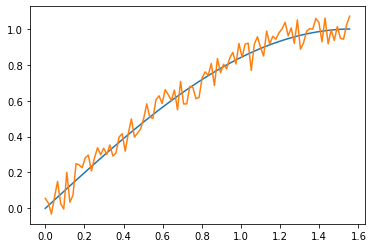

In [18]:
import matplotlib.pyplot as plt

plt.plot(np.arange(0,math.pi/2,h),sin_0_90,label="exact sine")
plt.plot(np.arange(0,math.pi/2,h),sin_0_90_noise,label="noisy sine")

### Higher-order Riemann sums increase the accuracy of our approximations

We can greatly improve the efficiency of our integration by
approximating the slices as trapezoids instead of as rectangles. This is
because the area under the trapezoids is a considerably better
approximation to the area under the curve.

<mark> The trapezoidal rule a first-order integration rule that will
integrate a first-order polynomial (ie, a straight line) exactly. We can
say it is *accurate* to order $h$ ($\mathcal{O}(h)$) and has an *error*
of order $h^2$ $\mathcal{O}(h^2)$ </mark>.

<img src="../images/integration3.png" width=500 />

In many cases we can use Simpson’s Rule for greater accuracy still. This
technique involves fitting quadratic curves to pairs of slices and then
calculating the area under the quadratics. In many cases Simpson’s rule
is more accurate than the trapezoidal rule, but this is not guaranteed
for all integrands.

> **Keypoints**
>
> -   Depending on the functional form of f(x), it may not be possible
>     to calculate an integral analytically
> -   Riemann sums are a family of methods used for approximating
>     integral
> -   The simplest Riemann sum is based on rectangular slices
> -   The rectangular slices method can be translated to Python code in
>     a straight-forward manner
> -   Riemann sums can be adapted for use with discrete data
> -   Higher-order Riemann sums increase the accuracy of our
>     approximations

### Test your understanding

> **Integrating a semicircle**
>
> 1.  Use Riemann sums (with 100 rectangular slices) to calculate the
>     value of the integral:
>
> $$ I = \int_{-1}^1\sqrt{1-x^2}\mathrm{d}x $$
>
> 1.  How does this compare to exact answer? (Hint: the integrand is a
>     semicircle of radius 1)
>
> 2.  How can you improve the accuracy of your estimate?
>
> > **Show answer**
> >
> > 1.  We can use the same approach as in the tutorial, but with a
> >     different function for calculating the integrand.
> >
> > ``` python
> > import math
> >
> > def semicircle(x):
> >     
> >     return math.sqrt(1-x**2)
> >
> > def rectangular_slice_integral(f_x, a, b, N):
> >     
> >     integral = 0
> >     h = (b-a) / N   # h is the width of each slice
> >     for i in range(N):
> >         x = a + h*i # the x value for the slice
> >         integral += f_x(x)*h
> >     return integral
> >     
> > rectangular_slice_integral(semicircle, -1, 1, 100)
> > ```
> >
> > ``` output
> > 1.5691342555492505
> > ```
> >
> > 1.  The exact answer is $\frac{\pi}{2}$. The error on our
> >     calculation is
> >
> > ``` python
> > math.pi/2 - rectangular_slice_integral(semicircle, -1, 1, 100)
> > ```
> >
> > ``` output
> > 0.0016620712456461018
> > ```
> >
> > 1.  To improve the accuracy we can use a larger number of slices:
> >
> > ``` python
> > math.pi/2 - rectangular_slice_integral(semicircle, -1, 1, 1000)
> > ```
> >
> > ``` output
> > 5.2588293825595045e-05
> > ```